# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from config import weatherapi_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

615
['pisco', 'bluefields', 'hilo', 'barrow', 'grindavik', 'ushuaia', 'dryden', 'montrose', 'tazovskiy', 'geraldton', 'shingu', 'rikitea', 'rocha', 'cape town', 'klaksvik', 'kodiak', 'ilhabela', 'busselton', 'alta floresta', 'mataura', 'arkhangelskoye', 'tsihombe', 'dingle', 'punta arenas', 'sur', 'puerto suarez', 'coihaique', 'kapaa', 'barentsburg', 'vila franca do campo', 'atuona', 'srednekolymsk', 'arraial do cabo', 'saldanha', 'tiksi', 'kazan', 'asau', 'airai', 'tambovka', 'yalvac', 'stettler', 'new norfolk', 'vaini', 'darnetal', 'lorengau', 'fairbanks', 'lincoln', 'batemans bay', 'qasigiannguit', 'tezu', 'saint-joseph', 'sangar', 'bathsheba', 'tuktoyaktuk', 'pervomayskoye', 'samusu', 'taolanaro', 'abbeville', 'sorvag', 'nikolskoye', 'gizo', 'flin flon', 'diamantino', 'hobart', 'fort morgan', 'erice', 'jumla', 'haifa', 'myanaung', 'yebaishou', 'maceio', 'clyde river', 'jamestown', 'cabo san lucas', 'hermanus', 'yellowknife', 'castro', 'nuuk', 'sorong', 'zapatoca', 'hithadhoo', 'upe

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = ""
units = "imperial"
city_name = []
lat = []
lon = []
temp = []
maxtemp = []
humid = []
cloud = []
country = []
date = []
wind = []
city_df = []

api_cnt = 50
set_cnt = 1
city_cnt = 1
next_city = 0
city_found = 0
city_not_found = 0
nr_cities = 0

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weatherapi_key}&units={units}&q="
print(f"Beginning Data Retrieval")
print(f"------------------------")

while set_cnt < api_cnt:
    while (city_cnt < 50) and (nr_cities < len(cities)):
        city = cities[next_city]
        print(f"Processing Record {city_cnt} of Set {set_cnt} | {city}")
        try:
            city = cities[next_city]
            response = requests.get(query_url + city).json()    
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            maxtemp.append(response['main']['temp_max'])
            humid.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            wind.append(response['wind']['speed'])
            city_found +=1
        except:
            if response['cod'] == '404':  # Not found
                print(f"     City not found. Skipping... {city}")
                city_not_found +=1
            else:
                print(f"     Other error {response['cod']}")
                
        city_cnt +=1
        next_city +=1
        nr_cities +=1
    set_cnt +=1
    city_cnt = 0

print(f"------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------")

#print(city_found)
#print(city_not_found)
#print(nr_cities)

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | bluefields
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | grindavik
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | dryden
Processing Record 8 of Set 1 | montrose
Processing Record 9 of Set 1 | tazovskiy
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | shingu
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | rocha
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | ilhabela
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | alta floresta
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | arkhangelskoye
Processing Record 22 of Set 1 | tsihombe
     City not found. Skipping... tsihombe
Processing Record 

     City not found. Skipping... sahrak
Processing Record 33 of Set 4 | numaligarh
Processing Record 34 of Set 4 | rantoul
Processing Record 35 of Set 4 | khatanga
Processing Record 36 of Set 4 | bambous virieux
Processing Record 37 of Set 4 | alice springs
Processing Record 38 of Set 4 | nambour
Processing Record 39 of Set 4 | lufilufi
Processing Record 40 of Set 4 | ulaangom
Processing Record 41 of Set 4 | sobolevo
Processing Record 42 of Set 4 | burnie
Processing Record 43 of Set 4 | berdigestyakh
Processing Record 44 of Set 4 | krasnoarmeysk
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | suraia
Processing Record 47 of Set 4 | dakar
Processing Record 48 of Set 4 | saa
Processing Record 49 of Set 4 | vaitape
Processing Record 0 of Set 5 | fortuna
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | anapskaya
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | lebu
Processing Reco

Processing Record 14 of Set 8 | puerto carreno
Processing Record 15 of Set 8 | korla
     City not found. Skipping... korla
Processing Record 16 of Set 8 | grimshaw
Processing Record 17 of Set 8 | gamba
Processing Record 18 of Set 8 | ushtobe
Processing Record 19 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 8 | ust-kuyga
Processing Record 21 of Set 8 | salinopolis
Processing Record 22 of Set 8 | tumut
Processing Record 23 of Set 8 | tlacotalpan
Processing Record 24 of Set 8 | umzimvubu
     City not found. Skipping... umzimvubu
Processing Record 25 of Set 8 | tamandare
Processing Record 26 of Set 8 | hovd
Processing Record 27 of Set 8 | bethel
Processing Record 28 of Set 8 | juifang
     City not found. Skipping... juifang
Processing Record 29 of Set 8 | puerto escondido
Processing Record 30 of Set 8 | ambilobe
Processing Record 31 of Set 8 | kuandian
Processing Record 32 of Set 8 | sarangani
Processing Record 33 of Set 8 | trenggalek
Processing Record 34 of Set 8 |

Processing Record 38 of Set 11 | biak
Processing Record 39 of Set 11 | vytegra
Processing Record 40 of Set 11 | meulaboh
Processing Record 41 of Set 11 | faisalabad
Processing Record 42 of Set 11 | tocantinopolis
     City not found. Skipping... tocantinopolis
Processing Record 43 of Set 11 | sopotnica
Processing Record 44 of Set 11 | ardabil
Processing Record 45 of Set 11 | acajutla
Processing Record 46 of Set 11 | codrington
Processing Record 47 of Set 11 | yaya
Processing Record 48 of Set 11 | skoczow
Processing Record 49 of Set 11 | haibowan
     City not found. Skipping... haibowan
Processing Record 0 of Set 12 | moroni
Processing Record 1 of Set 12 | newport
Processing Record 2 of Set 12 | tual
Processing Record 3 of Set 12 | mumford
Processing Record 4 of Set 12 | camopi
Processing Record 5 of Set 12 | barbar
     City not found. Skipping... barbar
Processing Record 6 of Set 12 | pasighat
Processing Record 7 of Set 12 | te anau
Processing Record 8 of Set 12 | raub
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:


city_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Max Temperature": maxtemp,
    "Humidity": humid,
    "Cloud Level": cloud,
    "Date": date,
    "Wind Speed": wind
}

city_data = pd.DataFrame(city_dict)
print(len(city_data))
city_data.head()

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
city_data.to_csv("city_data.csv", encoding="utf-8", index=False)

city_data.head()

549


,City,Country,Latitude,Longitude,Temperature,Max Temperature,Humidity,Cloud Level,Date,Wind Speed
0,Pisco,PE,-13.71,-76.20,62.60,62.60,82,0,1538179200,10.29
1,Bluefields,NI,12.01,-83.77,77.16,77.16,96,92,1538185740,3.42
2,Hilo,US,19.71,-155.08,81.73,86.00,65,20,1538178960,9.17
3,Barrow,AR,-38.31,-60.23,59.91,59.91,97,92,1538183822,7.96
4,Grindavik,IS,63.84,-22.43,43.48,44.60,87,75,1538181000,20.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

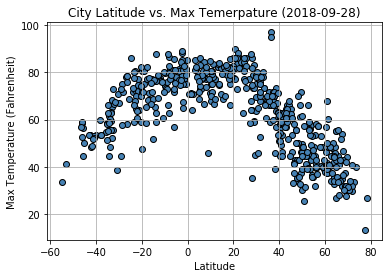

In [17]:
#Latitude vs. Temperature Plot
# Build a scatter plot for each data type
plt.scatter(city_data["Latitude"], city_data["Max Temperature"], marker="o", edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Max Temerpature ({now})")
plt.ylabel(f"Max Temperature (Fahrenheit)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CItyLatitudevsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

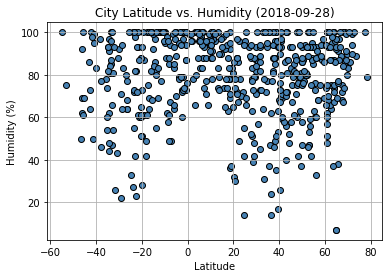

In [18]:
#City Latitude vs. Humidity Plot
# Build a scatter plot for each data type
plt.scatter(city_data["Latitude"], city_data["Humidity"], marker="o", edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Humidity ({now})")
plt.ylabel(f"Humidity (%)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CItyLatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

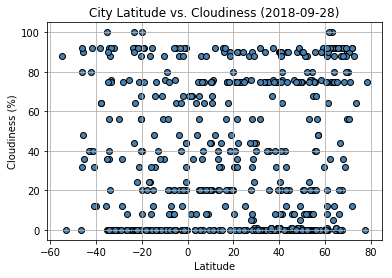

In [19]:
#City Latitude vs. Cloudiness Plot
# Build a scatter plot for each data type
plt.scatter(city_data["Latitude"], city_data["Cloud Level"], marker="o", edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Cloudiness ({now})")
plt.ylabel(f"Cloudiness (%)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CItyLatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

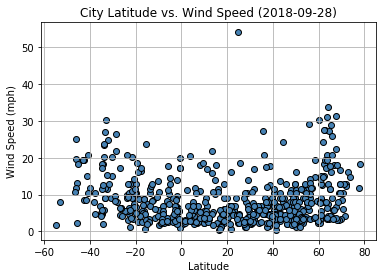

In [20]:
#City Latitude vs. Wind Speed Plot
# Build a scatter plot for each data type
plt.scatter(city_data["Latitude"], city_data["Wind Speed"], marker="o", edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({now})")
plt.ylabel(f"Wind Speed (mph)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CItyLatitudevsWindSpeed.png")

# Show plot
plt.show()